 ## Homework 1 - Report

Cecília Correia, 106827
<br>Patrícia Gameiro, 107245

In [2]:
from scipy.io import arff
import pandas as pd

data = loadarff("./data/diabetes.arff")
df = pd.DataFrame(data[0])

### Ex 1) ANOVA is a statistical test that can be used to assess the discriminative power of a single input variable. Using f_classif from sklearn, identify the input variables with the worst and best discriminative power. Plot their class-conditional probability density functions.

Highest discriminative power: degree_spondylolisthesis
Lowest discriminative power: pelvic_radius


/home/alex/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/alex/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/alex/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

Text(0.5, 1.0, 'Lowest discriminative power')

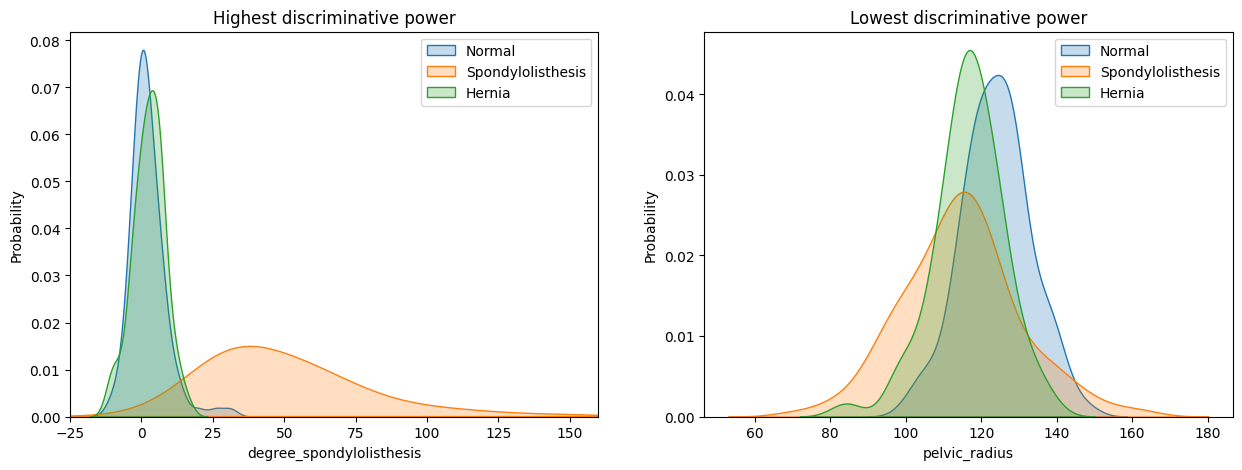

In [3]:
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop("class", axis=1)
y = df['class'].tolist()

fimportance = f_classif(X, y)

highest_dpower = fimportance[0].argmax()
highest_dpower = X.columns.values[highest_dpower]

lowest_dpower = fimportance[0].argmin()
lowest_dpower = X.columns.values[lowest_dpower]

print("Highest discriminative power:", highest_dpower)
print("Lowest discriminative power:", lowest_dpower)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)

sns.kdeplot(df[df['class'] == b'Normal'][highest_dpower], fill = True)
sns.kdeplot(df[df['class'] == b'Spondylolisthesis'][highest_dpower], fill = True)
sns.kdeplot(df[df['class'] == b'Hernia'][highest_dpower], fill = True)

plt.legend(("Normal", "Spondylolisthesis", "Hernia"))
plt.ylabel('Probability')
plt.title('Highest discriminative power')
plt.xlim(-25, 160)

plt.subplot(1, 2, 2)

sns.kdeplot(df[df['class'] == b'Normal'][lowest_dpower], fill = True)
sns.kdeplot(df[df['class'] == b'Spondylolisthesis'][lowest_dpower], fill = True)
sns.kdeplot(df[df['class'] == b'Hernia'][lowest_dpower], fill = True)

plt.legend(("Normal", "Spondylolisthesis", "Hernia"))
plt.ylabel('Probability')
plt.title('Lowest discriminative power')


### Ex 2) Using a stratified 80-20 training-testing split with a fixed seed (random_state=1), assess in a single plot both the training and testing accuracies of a decision tree with minimum sample split in {2, 5,10, 20, 30, 50, 100} and the remaining parameters as default.
[optional] Note that split thresholding of numeric variables in decision trees is non- deterministic in sklearn, hence you may opt to average the results using 10 runs per parameterization.

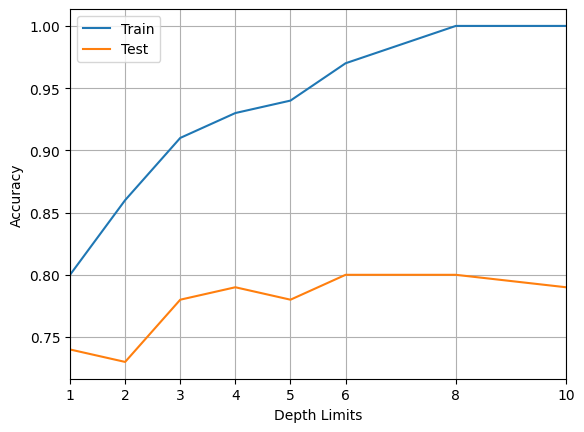

In [15]:
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, random_state= 0)

depth_limits = (1, 2, 3, 4, 5, 6, 8, 10)
train_accuracies = []
test_accuracies = []
runs = 10

for depth in depth_limits:
    train_acc = 0
    test_acc = 0

    for i in range(runs):
        predictor = tree.DecisionTreeClassifier(max_depth= depth, random_state=0)
        predictor.fit(X_train, y_train)

        y_pred = predictor.predict(X_train)
        train_acc += metrics.accuracy_score(y_train, y_pred)

        y_pred = predictor.predict(X_test)
        test_acc += metrics.accuracy_score(y_test, y_pred)

    train_accuracies.append(round(train_acc / runs, 2))
    test_accuracies.append(round(test_acc / runs, 2))

plt.plot(depth_limits, train_accuracies)
plt.plot(depth_limits, test_accuracies)
plt.xlabel('Depth Limits')
plt.ylabel('Accuracy')
plt.xticks(depth_limits)
plt.xlim(depth_limits[0], depth_limits[len(depth_limits) - 1])
plt.legend(("Train", "Test"))
plt.grid(True)

### Ex 3) Critically analyze these results, including the generalization capacity across settings.

In the results above, you can see that the accuracy increases along with the depth limit. However the testing accuracy eventually starts to decrease, which indicates overffiting.
Looking at the gap between the training and testing accuracy, you can assess the generalization capacity. A good gap should be small with well balanced accuracy values from both training and testing. So, the most benefitial depth limit would probably be 8.

### Ex 4) To deploy the predictor, a healthcare provider opted to learn a single decision tree (random_state=1) using all available data and ensuring that the maximum depth would be 3 in order to avoid overfitting risks.
i. Plot the decision tree.

[Text(0.5555555555555556, 0.9166666666666666, 'degree_spondylolisthesis <= 16.079\nsamples = 310\nvalue = [60, 100, 150]\nclass = Normal'),
 Text(0.3333333333333333, 0.75, 'sacral_slope <= 28.136\nsamples = 162\nvalue = [60, 97, 5]\nclass = Spondylolisthesis'),
 Text(0.2222222222222222, 0.5833333333333334, 'samples = 35\nvalue = [26, 9, 0]\nclass = Hernia'),
 Text(0.4444444444444444, 0.5833333333333334, 'pelvic_radius <= 117.36\nsamples = 127\nvalue = [34, 88, 5]\nclass = Spondylolisthesis'),
 Text(0.2222222222222222, 0.4166666666666667, 'sacral_slope <= 40.149\nsamples = 47\nvalue = [24, 19, 4]\nclass = Hernia'),
 Text(0.1111111111111111, 0.25, 'samples = 25\nvalue = [19, 5, 1]\nclass = Hernia'),
 Text(0.3333333333333333, 0.25, 'samples = 22\nvalue = [5, 14, 3]\nclass = Spondylolisthesis'),
 Text(0.6666666666666666, 0.4166666666666667, 'degree_spondylolisthesis <= 5.034\nsamples = 80\nvalue = [10, 69, 1]\nclass = Spondylolisthesis'),
 Text(0.5555555555555556, 0.25, 'pelvic_radius <= 1

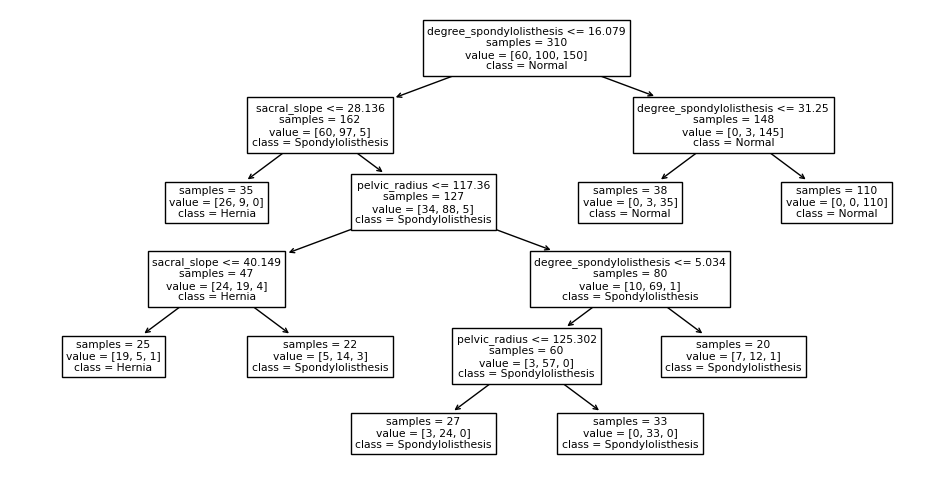

In [ ]:
predictor = tree.DecisionTreeClassifier(min_samples_leaf= 20, random_state= 0)
predictor.fit(X, y)

figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names= X.columns.values.tolist(), class_names= list(data[1]['class'][1]), impurity=False)

ii. Explain what characterizes diabetes by identifying the conditional associations together with their posterior probabilities.

The hernia-conditional associations are the following:<br>
sacral slope <= 28.136 <br>
or <br>
sacral slope >= 28.136
pevlic_radius <= 117.36
sacral_slope <= 40.149